In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [11]:
#Read file
df=pd.read_csv('bom.movie_gross.csv')

# Business Understanding
The goal of this project is to explore the relationship between the domestic and forein gross earnings of movies. It also seeks to find out whether a particular genre performs better than the other in domestic vs International markets.

# Data Understanding

In [16]:
df.info()

#Data has 5 Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
df.head(20)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [15]:
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [20]:
#identifying missing values

df.isnull().sum()

#Column "foreign_gross" has majority of missing values

,0
title,0
studio,5
domestic_gross,28
foreign_gross,1350
year,0


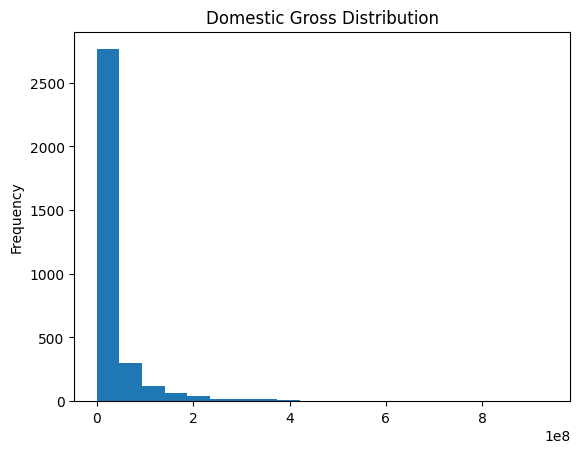

In [22]:
df['domestic_gross'].plot(kind='hist', title='Domestic Gross Distribution', bins=20)
plt.show()

In [25]:
df['foreign_gross'].plot(kind='hist', title='Foreign Gross Distribution', bins=20)
plt.show()

#"foreign gross cannot plot because of the numerous missing values"

TypeError: no numeric data to plot

## Data Cleaning

In [29]:
df['foreign_gross']=pd.to_numeric(df['foreign_gross'],errors='coerce')

#convert figures to numeric values

In [32]:
#replace missing values with mean
df['foreign_gross'].fillna(df['foreign_gross'].mean(), inplace=True)

<ipython-input-32-3078c1aa9774>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['foreign_gross'].fillna(df['foreign_gross'].mean(), inplace=True)


In [34]:
df.isnull().sum()

,0
title,0
studio,5
domestic_gross,28
foreign_gross,0
year,0


In [35]:
# Removing duplicates

df.drop_duplicates()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.505704e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.505704e+07,2018
3384,El Pacto,Sony,2500.0,7.505704e+07,2018
3385,The Swan,Synergetic,2400.0,7.505704e+07,2018


In [36]:
df.duplicated().sum()

0

In [57]:
# Introduce Column "Total Gross" and "% Domestic gross"

df['total_gross']=df['domestic_gross']+df['foreign_gross']
df['%_domestic_gross']= (df['domestic_gross'] / df['total_gross'])*100

df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,ratio_domestic_gross,%_domestic_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,38.894096,38.894096
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,32.588981,32.588981
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,30.823701,30.823701
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,35.325365,35.325365
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,31.716715,31.716715


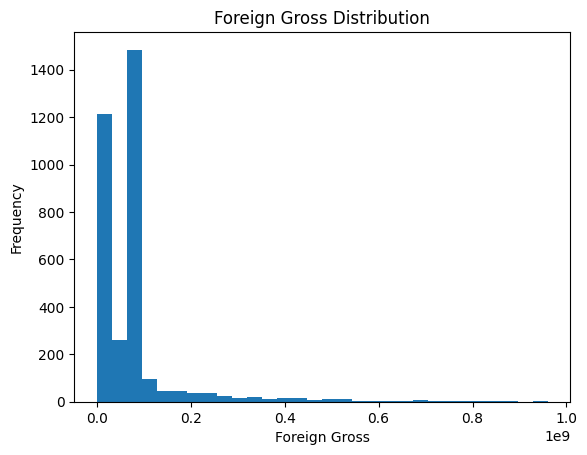

In [61]:
#show foreign-gross distribution
df['foreign_gross'].plot(kind='hist', bins=30, title='Foreign Gross Distribution')
plt.xlabel('Foreign Gross')
plt.show()

In [63]:
#Checking correlation betwenn foreign gross and domestic gross

corr=df[['domestic_gross','foreign_gross']].corr()
print(corr)

                domestic_gross  foreign_gross
domestic_gross        1.000000       0.733198
foreign_gross         0.733198       1.000000


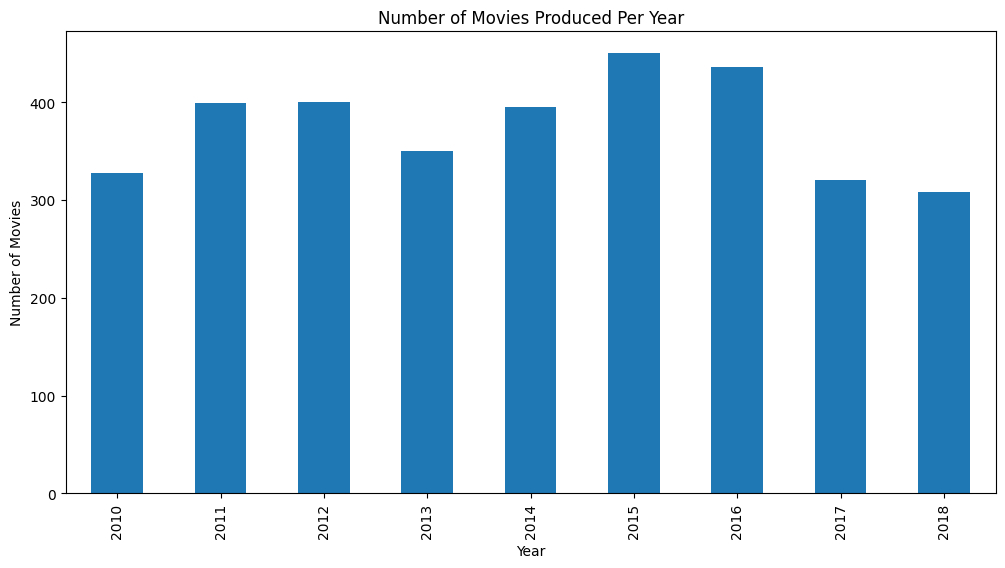

In [68]:
#plot to show distribution of movies produced per year
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), title='Number of Movies Produced Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


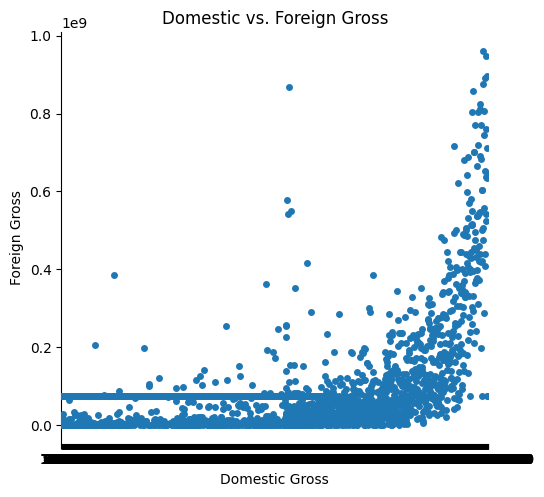

In [75]:
#plot to show domestic gross vs foreign gross
sns.catplot(x='domestic_gross', y='foreign_gross', data=df)
plt.title('Domestic vs. Foreign Gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.show()

In [77]:
#Try using group-by to group columns by "studio"
studio_analysis = df.groupby('studio')[['domestic_gross', 'foreign_gross']].mean().sort_values(by='domestic_gross', ascending=False)
studio_analysis.head(10)

,domestic_gross,foreign_gross
studio,,
BV,1.737644e+08,2.461706e+08
P/DW,1.682900e+08,3.393600e+08
WB (NL),8.879333e+07,1.425346e+08
Uni.,8.777138e+07,1.177218e+08
WB,8.691461e+07,1.387034e+08
Fox,8.051103e+07,1.485734e+08
Sony,7.761177e+07,1.295053e+08
Par.,7.609773e+07,1.226612e+08
MGM,6.666667e+07,6.255235e+07


from matplotlib import pyplot as plt
_df_0['domestic_gross'].plot(kind='hist', bins=20, title='domestic_gross')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['foreign_gross'].plot(kind='hist', bins=20, title='foreign_gross')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='domestic_gross', y='foreign_gross', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['domestic_gross'].plot(kind='line', figsize=(8, 4), title='domestic_gross')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['foreign_gross'].plot(kind='line', figsize=(8, 4), title='foreign_gross')
plt.gca().spines[['top', 'right']].set_visible(False)